# **Introduction**


**Goal**

This project delves into the realm of image classification, with a focus on the CIFAR-10 dataset. The primary goal is to build and optimize convolutional neural network (CNN) models for accurately classifying diverse images across ten distinct categories.

**Approach**

1. **Data Preprocessing**:

Load and preprocess the CIFAR-10 dataset.
Normalize pixel values to a standard scale (0 to 1).
Apply data augmentation techniques to enhance model generalization.

2. **Baseline CNN Model**:

Design a baseline CNN architecture tailored for image classification.
Implement hyperparameter tuning to optimize the model's learning and generalization capabilities.

3. **Training and Evaluation**:

Train the baseline CNN model on the preprocessed dataset.
Evaluate the model's performance using standard metrics such as accuracy and loss.
Save the best-performing model for future use.

4. **VGG16 Transfer Learning**:

Employ the VGG16 architecture with transfer learning.
Fine-tune the model on the CIFAR-10 dataset.
Save the trained VGG16-based model for further exploration.

5. **Outcome**:

Showcase the results of both models, emphasizing their accuracy and effectiveness in classifying images.
Provide visualizations of model predictions on sample test images.

6. **Conclusion**:

This project serves as a comprehensive exploration of image classification techniques, showcasing the development of a baseline CNN and the application of transfer learning with VGG16. The aim is to achieve superior accuracy in categorizing images from the CIFAR-10 dataset, highlighting the power of deep learning in real-world applications.

# **Importing necessary libraries**

In [1]:
!pip install scikeras

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt
from scikeras.wrappers import KerasClassifier
import numpy as np

# **Loading the Dataset**

In [3]:
(train_images, train_labels),(test_images, test_labels) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


label :  [9]


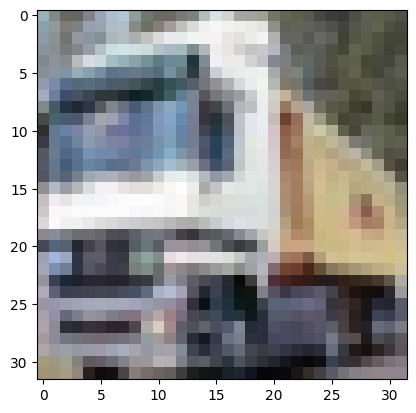

training images shape : (50000, 32, 32, 3)
testing images shape:  (10000, 32, 32, 3)


In [4]:
print('label : ', train_labels[1])
plt.imshow(train_images[1])
plt.show()
print('training images shape :', train_images.shape)
print('testing images shape: ', test_images.shape)

# **Normalization and reshaping**

In [5]:
train_images, test_images = train_images/255.0, test_images/255.0
train_images, test_images = train_images.reshape(train_images.shape[0],32,32,3),\
 test_images.reshape(test_images.shape[0],32,32,3)

# **Data Augmentation**

In [6]:
data_generator = ImageDataGenerator(
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    horizontal_flip = True
)

data_generator.fit(train_images)

# **baseline model**

In [10]:
def baseline_model_creation():
    baseline_model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D(2, 2),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(32, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(10, activation='softmax')
    ])

    baseline_model.compile(optimizer='adam',
                          loss='sparse_categorical_crossentropy',
                          metrics=['accuracy'])

    return baseline_model

**Optional : Hyperparameter Tuning**

In [ ]:
# baseline_model = KerasClassifier(build_fn=baseline_model_creation,
#                                  learning_rate=0.01,
#                                  dropout_rate=0.2,
#                                  node1=128,
#                                  node2=64,
#                                  epochs=5,
#                                  batch_size=256)

In [ ]:
# params_tuning = {
#     'learning_rate' : np.logspace(-4,0, num=20),
#     'node1' : randint(64, 256),
#     'node2' : randint(32, 128),
#     'dropout_rate' : [0.2,0.4],
#     'epochs' : [15, 20],
#     'batch_size' : [64, 128, 256]
# }

In [ ]:
# random_search = RandomizedSearchCV(estimator = baseline_model, param_distributions=params_tuning,n_iter=10, cv=4)
# random_result = random_search.fit(train_images,train_labels)
# print('best parameter : ' random_result.best_params)

**Model Creation**

In [11]:
best_baseline_model = baseline_model_creation()

best_baseline_model.fit(data_generator.flow(train_images, train_labels),
                        epochs = 40,
                        batch_size = 512,
                        validation_data = (test_images,test_labels))
best_baseline_model.save('/content/drive/MyDrive/dl .hs files/img classification cifar10/baseline_model.h5')

Epoch 1/40
1563/1563 [==============================] - 49s 26ms/step - loss: 1.9267 - accuracy: 0.1297 - val_loss: 1.6077 - val_accuracy: 0.0431
Epoch 2/40
1563/1563 [==============================] - 39s 25ms/step - loss: 1.6761 - accuracy: 0.0871 - val_loss: 1.4585 - val_accuracy: 0.0538
Epoch 3/40
1563/1563 [==============================] - 39s 25ms/step - loss: 1.5722 - accuracy: 0.0878 - val_loss: 1.3454 - val_accuracy: 0.0451
Epoch 4/40
1563/1563 [==============================] - 44s 28ms/step - loss: 1.4952 - accuracy: 0.0869 - val_loss: 1.2721 - val_accuracy: 0.0916
Epoch 5/40
1563/1563 [==============================] - 41s 26ms/step - loss: 1.4511 - accuracy: 0.0909 - val_loss: 1.2540 - val_accuracy: 0.1141
Epoch 6/40
1563/1563 [==============================] - 41s 26ms/step - loss: 1.4175 - accuracy: 0.0914 - val_loss: 1.1891 - val_accuracy: 0.0737
Epoch 7/40
1563/1563 [==============================] - 39s 25ms/step - loss: 1.3817 - accuracy: 0.0938 - val_loss: 1.2041 -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


**Predicting with Baseline model**

In [25]:
def predict(model, test_images):
    class_labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

    fig, axes = plt.subplots(1, 6, figsize=(15, 3))

    for i in range(6):
        input_image = test_images[i].reshape((1, 32, 32, 3))
        predictions = model.predict(input_image)
        predicted_label = np.argmax(predictions[0])

        axes[i].imshow(test_images[i])
        axes[i].set_title(f'Predicted: {class_labels[predicted_label]}')
        axes[i].axis('off')

    plt.show()

1/1 [==============================] - 0s 20ms/step


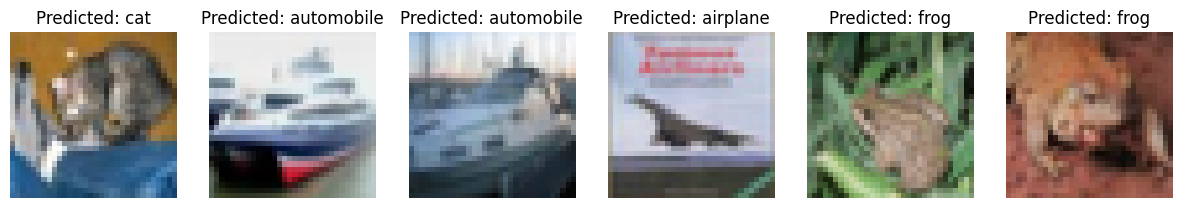

In [27]:
predict(best_baseline_model, test_images)

**Evaluate the baseline model**

In [28]:
test_loss, test_acc_cnn = best_baseline_model.evaluate(test_images, test_labels, verbose=2)

313/313 - 1s - loss: 0.9242 - accuracy: 0.1117 - 1s/epoch - 3ms/step


# **Transfer Learning (VGG16 - CNN Feature Extractor + Custom ANN)**

In [29]:
vgg_cnn = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

for layer in vgg_cnn.layers:
    layer.trainable = False

vgg16_model = models.Sequential([
    vgg_cnn,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

58889256/58889256 [==============================] - 2s 0us/step


In [30]:
vgg16_model.compile(optimizer='adam',
                    loss = 'sparse_categorical_crossentropy',
                    metrics = ['accuracy'])

vgg16_model.fit(data_generator.flow(train_images,train_labels),
                epochs = 32,
                batch_size = 256,
                validation_data = (test_images, test_labels))

vgg16_model.save('/content/drive/MyDrive/dl .hs files/img classification cifar10/VGG16_CNN_model.h5')

Epoch 1/32
1563/1563 [==============================] - 48s 30ms/step - loss: 1.6197 - accuracy: 0.0979 - val_loss: 1.3462 - val_accuracy: 0.1423
Epoch 2/32
1563/1563 [==============================] - 47s 30ms/step - loss: 1.4528 - accuracy: 0.0989 - val_loss: 1.3264 - val_accuracy: 0.0992
Epoch 3/32
1563/1563 [==============================] - 48s 31ms/step - loss: 1.4036 - accuracy: 0.0989 - val_loss: 1.2584 - val_accuracy: 0.1171
Epoch 4/32
1563/1563 [==============================] - 53s 34ms/step - loss: 1.3758 - accuracy: 0.0987 - val_loss: 1.2593 - val_accuracy: 0.0825
Epoch 5/32
1563/1563 [==============================] - 44s 28ms/step - loss: 1.3532 - accuracy: 0.0980 - val_loss: 1.2159 - val_accuracy: 0.1004
Epoch 6/32
1563/1563 [==============================] - 45s 29ms/step - loss: 1.3381 - accuracy: 0.0984 - val_loss: 1.2195 - val_accuracy: 0.1067
Epoch 7/32
1563/1563 [==============================] - 45s 29ms/step - loss: 1.3204 - accuracy: 0.0971 - val_loss: 1.1946 -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


**Predicting with VGG16_CNN model**

1/1 [==============================] - 0s 20ms/step


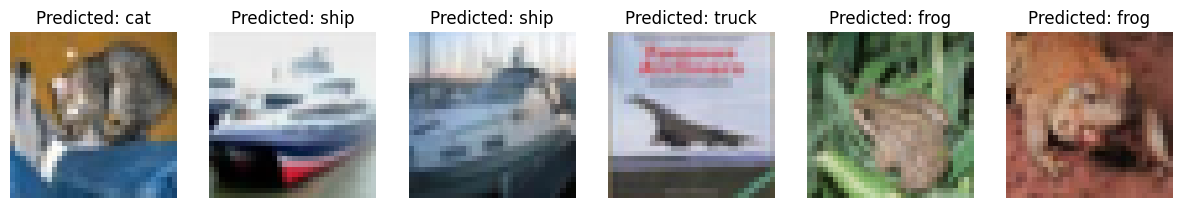

In [32]:
predict(vgg16_model,test_images)

**Evaluate the transfer learning model**

In [33]:
test_loss, test_acc_16 = vgg16_model.evaluate(test_images, test_labels, verbose=2)

313/313 - 2s - loss: 1.1606 - accuracy: 0.0990 - 2s/epoch - 8ms/step
